In [9]:
# Import dependencies
import psycopg2
import pandas as pd

In [7]:
# Connect to Postgres Database
connection = psycopg2.connect(user = "postgres",
                              password = "postgres",
                              host = "127.0.0.1",
                              port = "5433",
                              database = "covid_db")

cursor = connection.cursor()
    
# Create a table to store data
create_table_query = '''CREATE TABLE table5
          (id int primary key not null,
           country text not null,
           date date not null,
           price float,
           cases float); '''
    
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL")

Table created successfully in PostgreSQL


In [8]:
# Load data from merged CSV into Postgres
file = open('stocks_and_cases.csv', 'r')

cursor.copy_from(file, 'table5', columns=('id','country','date','price','cases'), sep=",")

In [11]:
df = pd.read_sql('select * from table5', connection)

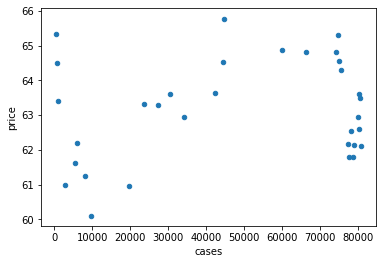

In [15]:
china = pd.read_sql("select * from table5 where country = 'CN'", connection)
china.plot.scatter(x='cases',y='price')